#Data Initialization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from yellowbrick.classifier import ClassificationReport
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


%matplotlib inline



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/Data/card_transdata.csv')
credit.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Renaming the Fraud column as the target value


In [ ]:
credit = credit.rename(columns={
    'fraud' : 'target'
})

credit.head()
credit.info

<bound method DataFrame.info of         distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2            

Splitting the data set

In [ ]:
X = credit.drop('target', axis = 1)
y = credit['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 42)

In [ ]:
X_train.shape

(800000, 7)

In [ ]:
X_test.shape

(200000, 7)

In [ ]:
y_train.shape

(800000,)

In [ ]:
y_test.shape

(200000,)

#EDA


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   target                          1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 566853 to 121958
Data columns (total 7 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              800000 non-null  float64
 1   distance_from_last_transaction  800000 non-null  float64
 2   ratio_to_median_purchase_price  800000 non-null  float64
 3   repeat_retailer                 800000 non-null  float64
 4   used_chip                       800000 non-null  float64
 5   used_pin_number                 800000 non-null  float64
 6   online_order                    800000 non-null  float64
dtypes: float64(7)
memory usage: 48.8 MB


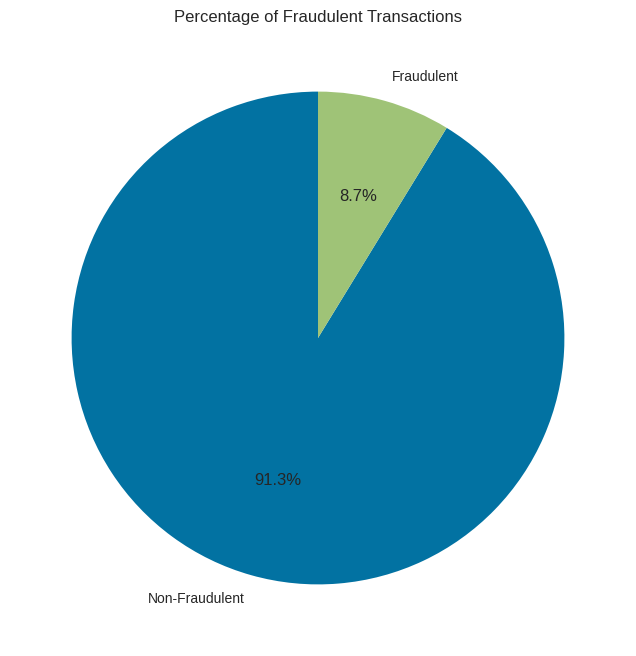

In [ ]:
#pie chart distribution
fraud_distribution = y_train.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fraud_distribution, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Fraudulent Transactions')
plt.show()

In [ ]:
credit['target'].value_counts()


0.0    912597
1.0     87403
Name: target, dtype: int64

In [ ]:
credit.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,target
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


<Figure size 800x600 with 0 Axes>

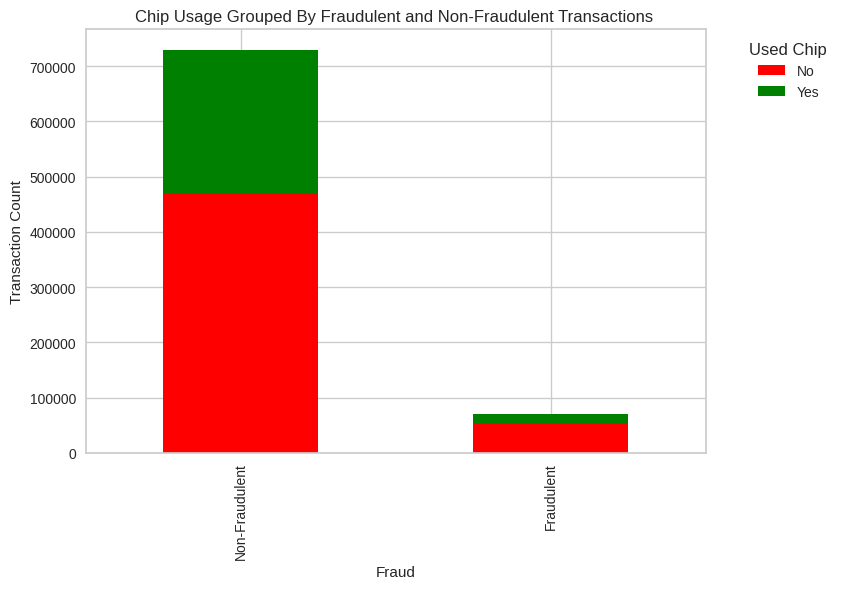

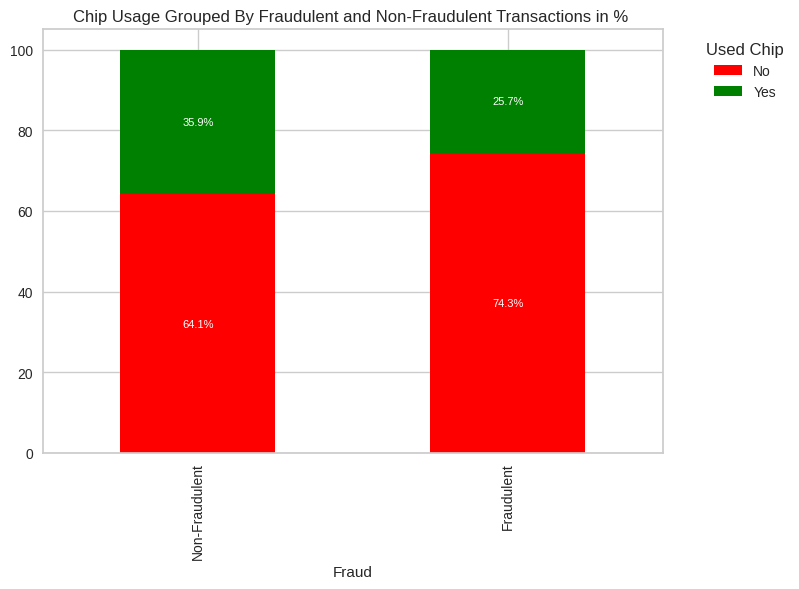

In [ ]:
#data frame combining features
df = pd.concat([X_train, y_train], axis=1)
chip_distribution = df.groupby([y_train, 'used_chip']).size().unstack()
#plotting grouped bar chart
plt.figure(figsize=(8, 6))
chip_distribution.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.xticks(range(len(chip_distribution)), ['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Fraud')
plt.ylabel('Transaction Count')
plt.title('Chip Usage Grouped By Fraudulent and Non-Fraudulent Transactions ')
plt.legend(title='Used Chip', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')

#calculating the percentage of chip usage by tranasaction type
chip_percentage = chip_distribution.div(chip_distribution.sum(axis=1), axis=0) * 100
ax = chip_percentage.plot(kind='bar', stacked=True, color=['red', 'green'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')
    plt.legend(title='Used Chip', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(len(chip_distribution)), ['Non-Fraudulent', 'Fraudulent'])
    plt.xlabel('Fraud')
    plt.title('Chip Usage Grouped By Fraudulent and Non-Fraudulent Transactions in % ')

plt.show()


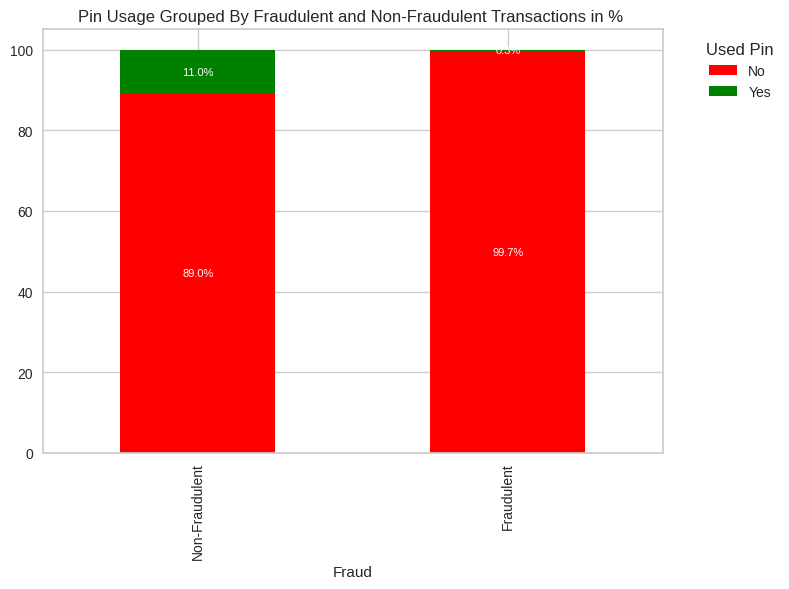

In [ ]:
#data frame combining features
df = pd.concat([X_train, y_train], axis=1)
pin_distribution = df.groupby([y_train, 'used_pin_number']).size().unstack()
#calculating the percentage of pin usage by tranasaction type
pin_percentage = pin_distribution.div(pin_distribution.sum(axis=1), axis=0) * 100
ax = pin_percentage.plot(kind='bar', stacked=True, color=['red', 'green'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')
    plt.legend(title='Used Pin', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(len(chip_distribution)), ['Non-Fraudulent', 'Fraudulent'])
    plt.xlabel('Fraud')
    plt.title('Pin Usage Grouped By Fraudulent and Non-Fraudulent Transactions in % ')

plt.show()

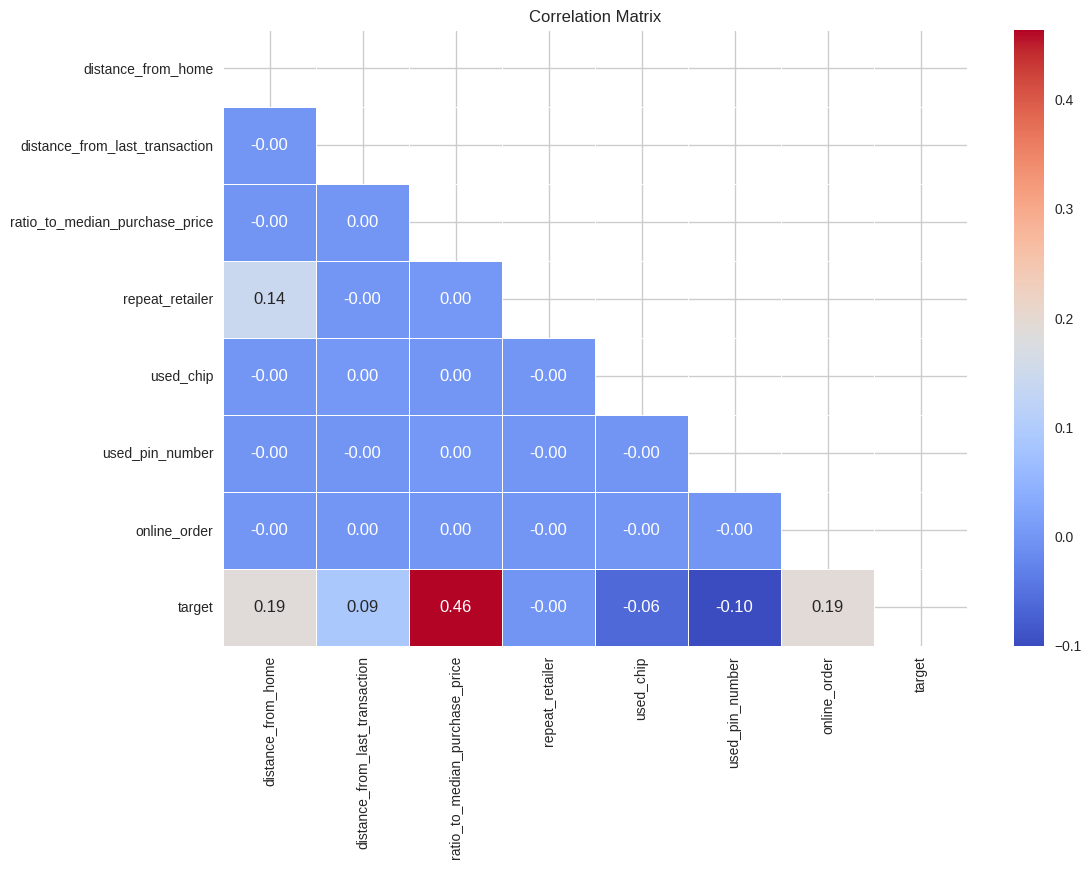

In [ ]:
df = pd.concat([X_train, y_train], axis=1)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')


plt.show()

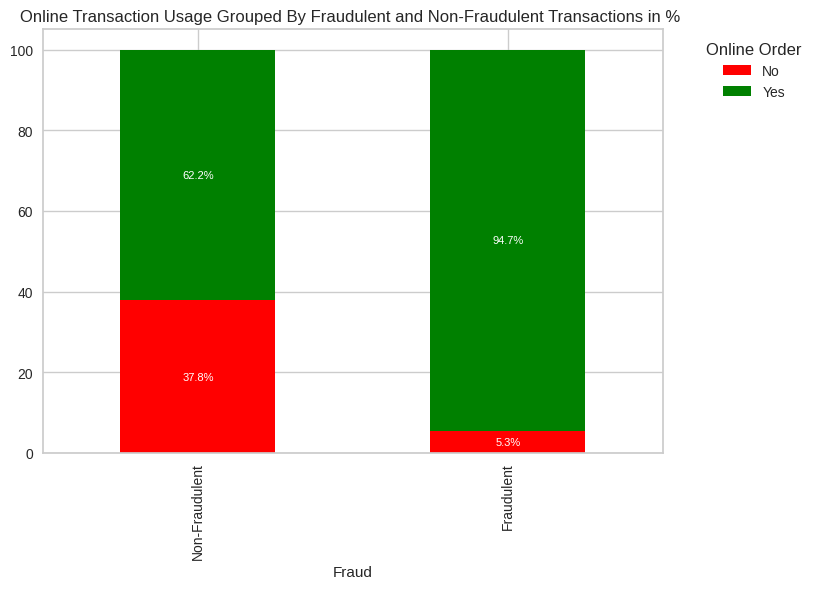

In [ ]:
#data frame combining features
df = pd.concat([X_train, y_train], axis=1)
online_distribution = df.groupby([y_train, 'online_order']).size().unstack()
#calculating the percentage of online usage by tranasaction type
online_percentage = online_distribution.div(online_distribution.sum(axis=1), axis=0) * 100
ax = online_percentage.plot(kind='bar', stacked=True, color=['red', 'green'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')
    plt.legend(title='Online Order', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(len(chip_distribution)), ['Non-Fraudulent', 'Fraudulent'])
    plt.xlabel('Fraud')
    plt.title('Online Transaction Usage Grouped By Fraudulent and Non-Fraudulent Transactions in % ')

plt.show()

In [ ]:
#data frame combining features
df = pd.concat([X_train, y_train], axis=1)

# Calculate mean for fraudulent transactions
mean_distance_fraudulent = df[df['target'] == 1]['distance_from_home'].mean()

# Calculate mean for non-fraudulent transactions
mean_distance_non_fraudulent = df[df['target'] == 0]['distance_from_home'].mean()

# Print the mean distances
print(f'Mean Distance from Home for Fraudulent Transactions: {mean_distance_fraudulent:.2f}')
print(f'Mean Distance from Home for Non-Fraudulent Transactions: {mean_distance_non_fraudulent:.2f}')

Mean Distance from Home for Fraudulent Transactions: 66.29
Mean Distance from Home for Non-Fraudulent Transactions: 22.82


In [ ]:
#data frame combining features
df = pd.concat([X_train, y_train], axis=1)

# Calculate mean for fraudulent transactions
ratio_to_median_purchase_price_fraudulent = df[df['target'] == 1]['ratio_to_median_purchase_price'].mean()

# Calculate mean for non-fraudulent transactions
ratio_to_median_purchase_price_non_fraudulent = df[df['target'] == 0]['ratio_to_median_purchase_price'].mean()

# Print the mean Ratio to Median
print(f'Mean Ratio to Median Purchase for Fraudulent Transactions: {ratio_to_median_purchase_price_fraudulent:.2f}')
print(f'Mean Ratio to Median Purchase for Non-Fraudulent Transactions: {ratio_to_median_purchase_price_non_fraudulent:.2f}')

Mean Ratio to Median Purchase for Fraudulent Transactions: 6.01
Mean Ratio to Median Purchase for Non-Fraudulent Transactions: 1.42


In [ ]:
X_train['repeat_retailer'].value_counts()

1.0    705213
0.0     94787
Name: repeat_retailer, dtype: int64

In [ ]:
credit.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
target                            0
dtype: int64

In [ ]:
X_train.describe(include = 'all')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,26.619659,5.026863,1.825205,0.881516,0.350356,0.100681,0.650567
std,65.213843,26.375663,2.794690,0.323180,0.477082,0.300906,0.476791
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000
25%,3.880890,0.296727,0.475573,1.000000,0.000000,0.000000,0.000000
50%,9.964660,0.998402,0.997891,1.000000,0.000000,0.000000,1.000000
75%,25.742404,3.358554,2.096306,1.000000,1.000000,0.000000,1.000000
max,8777.136420,11851.104565,266.689692,1.000000,1.000000,1.000000,1.000000


#Pre-Processing

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.14717014, -0.1811908 , -0.58818513, ...,  1.36170395,
        -0.33459348,  0.73288438],
       [-0.09117429, -0.16885924, -0.41565266, ...,  1.36170395,
        -0.33459348,  0.73288438],
       [-0.33481332, -0.1000095 ,  0.61286024, ...,  1.36170395,
        -0.33459348,  0.73288438],
       ...,
       [-0.09424595, -0.19042138, -0.32563131, ..., -0.73437402,
        -0.33459348, -1.36447171],
       [-0.25547956, -0.18421704, -0.23297423, ..., -0.73437402,
        -0.33459348,  0.73288438],
       [-0.39739255, -0.0955002 , -0.16555184, ...,  1.36170395,
        -0.33459348, -1.36447171]])

UnderSampling

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
X_train.shape



(800000, 7)

In [ ]:
y_train.shape

(800000,)

In [ ]:
y_train.value_counts()

0.0    730040
1.0     69960
Name: target, dtype: int64

In [ ]:
from imblearn.under_sampling import TomekLinks
under = TomekLinks()
X_train, y_train = under.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

0.0    729822
1.0     69960
Name: target, dtype: int64

# Classification Algorithms

Random Forest Model




In [ ]:
clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print(rf_acc)

0.99999


In [ ]:
#classifiction report
report = classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent'], output_dict=True)

#formating
def format_classification_report(report):
    formatted_report = f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}\n"
    for class_name, metrics in report.items():
        if class_name in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        formatted_report += f"{class_name:<15}{metrics['precision']:.2f}{' ' * 6}{metrics['recall']:.2f}{' ' * 6}{metrics['f1-score']:.2f}{' ' * 6}{metrics['support']}\n"
    return formatted_report

# Print the formatted report
print(format_classification_report(report))


Class          Precision Recall    F1-Score  Support   
Non-Fraudulent 1.00      1.00      1.00      182557
Fraudulent     1.00      1.00      1.00      17443



Accuracy on training set

Classification Report on Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    729822
         1.0       1.00      1.00      1.00     69960

    accuracy                           1.00    799782
   macro avg       1.00      1.00      1.00    799782
weighted avg       1.00      1.00      1.00    799782



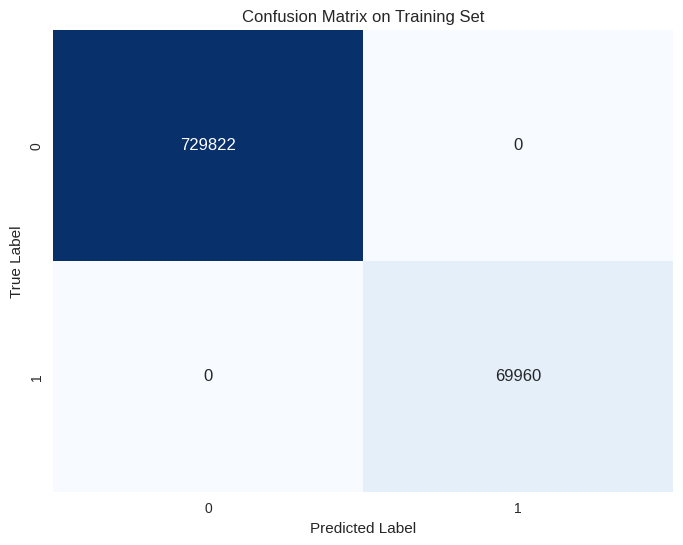

In [ ]:
y_train_pred = clf_rf.predict(X_train)
print("Classification Report on Training Set:")
print(classification_report(y_train, y_train_pred))
# Create a confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix on Training Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate error rate
error_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / sum(sum(conf_matrix))

print(f'Error Rate: {error_rate:.2f}')

Error Rate: 0.00


Logistic Regession Model

In [ ]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)

#classifiction report
report = classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent'], output_dict=True)

#formating
def format_classification_report(report):
    formatted_report = f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}\n"
    for class_name, metrics in report.items():
        if class_name in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        formatted_report += f"{class_name:<15}{metrics['precision']:.2f}{' ' * 6}{metrics['recall']:.2f}{' ' * 6}{metrics['f1-score']:.2f}{' ' * 6}{metrics['support']}\n"
    return formatted_report

# Print the formatted report
print(format_classification_report(report))


conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate error rate
error_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / sum(sum(conf_matrix))

print(f'Error Rate: {error_rate:.2f}')

0.95886
Class          Precision Recall    F1-Score  Support   
Non-Fraudulent 0.96      0.99      0.98      182557
Fraudulent     0.89      0.60      0.72      17443

Error Rate: 0.04


Naive Bayesian Classifiers

In [ ]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_pred = clf_gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred)
print(gnb_acc)

#classifiction report
report = classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent'], output_dict=True)

#formating
def format_classification_report(report):
    formatted_report = f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}\n"
    for class_name, metrics in report.items():
        if class_name in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        formatted_report += f"{class_name:<15}{metrics['precision']:.2f}{' ' * 6}{metrics['recall']:.2f}{' ' * 6}{metrics['f1-score']:.2f}{' ' * 6}{metrics['support']}\n"
    return formatted_report

# Print the formatted report
print(format_classification_report(report))


conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate error rate
error_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / sum(sum(conf_matrix))

print(f'Error Rate: {error_rate:.2f}')

0.95106
Class          Precision Recall    F1-Score  Support   
Non-Fraudulent 0.96      0.98      0.97      182557
Fraudulent     0.79      0.60      0.68      17443

Error Rate: 0.05


Support Vector Machine Model

In [ ]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)
print(svm_acc)

#classifiction report
report = classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent'], output_dict=True)

#formating
def format_classification_report(report):
    formatted_report = f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}\n"
    for class_name, metrics in report.items():
        if class_name in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        formatted_report += f"{class_name:<15}{metrics['precision']:.2f}{' ' * 6}{metrics['recall']:.2f}{' ' * 6}{metrics['f1-score']:.2f}{' ' * 6}{metrics['support']}\n"
    return formatted_report

# Print the formatted report
print(format_classification_report(report))

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate error rate
error_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / sum(sum(conf_matrix))

print(f'Error Rate: {error_rate:.2f}')

0.997975
Class          Precision Recall    F1-Score  Support   
Non-Fraudulent 1.00      1.00      1.00      182557
Fraudulent     0.99      0.99      0.99      17443

Error Rate: 0.00


KNeighborsClassifier

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
print(knn_acc)

#classifiction report
report = classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent'], output_dict=True)

#formating
def format_classification_report(report):
    formatted_report = f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}\n"
    for class_name, metrics in report.items():
        if class_name in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        formatted_report += f"{class_name:<15}{metrics['precision']:.2f}{' ' * 6}{metrics['recall']:.2f}{' ' * 6}{metrics['f1-score']:.2f}{' ' * 6}{metrics['support']}\n"
    return formatted_report

# Print the formatted report
print(format_classification_report(report))

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate error rate
error_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / sum(sum(conf_matrix))

print(f'Error Rate: {error_rate:.2f}')

0.998755
Class          Precision Recall    F1-Score  Support   
Non-Fraudulent 1.00      1.00      1.00      182557
Fraudulent     0.99      0.99      0.99      17443

Error Rate: 0.00


Classification Model Visualisation

<Axes: xlabel='Accuracy_score', ylabel='Model'>

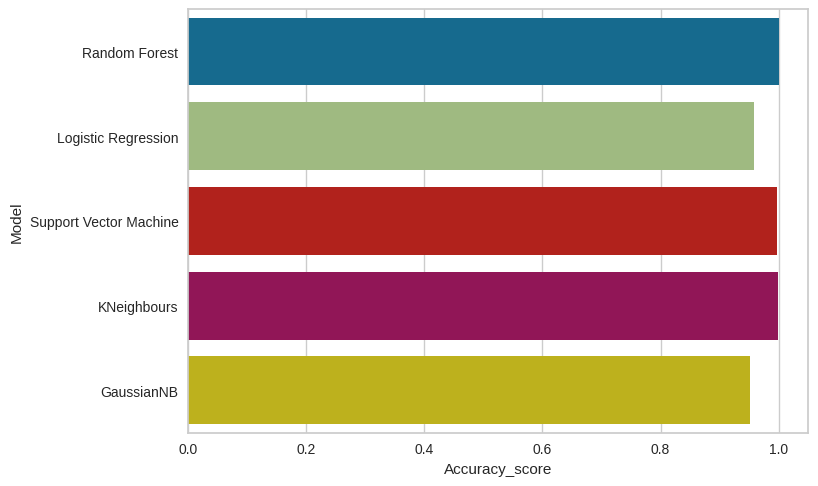

In [ ]:
models = pd.DataFrame({
    'Model' : ['Random Forest', 'Logistic Regression', 'Support Vector Machine','KNeighbours', 'GaussianNB'],
    'Accuracy_score': [rf_acc, lr_acc, svm_acc,knn_acc, gnb_acc]
})

sns.barplot(x='Accuracy_score', y='Model', data=models)

#Cross Validation

GaussianNB with Stratified KFold


In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
y_pred = cross_val_predict(GaussianNB(), X_train, y_train, cv=kf)
cross_val_score(GaussianNB(), X_train, y_train, cv=kf)
np.mean(cross_val_score(GaussianNB(), X_train, y_train, cv=kf))
cv_scores = cross_val_score(GaussianNB(), X_train, y_train, cv=kf, scoring='accuracy')
mean_cv_score = np.mean(cv_scores)
print(f"Mean Cross-Validated Score: {mean_cv_score:.2f}")

#classifiction report
report = classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent'], output_dict=True)

#formating
def format_classification_report(report):
    formatted_report = f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}\n"
    for class_name, metrics in report.items():
        if class_name in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        formatted_report += f"{class_name:<15}{metrics['precision']:.2f}{' ' * 6}{metrics['recall']:.2f}{' ' * 6}{metrics['f1-score']:.2f}{' ' * 6}{metrics['support']}\n"
    return formatted_report

# Print the formatted report
print(format_classification_report(report))

Mean Cross-Validated Score: 0.95


ValueError: Found input variables with inconsistent numbers of samples: [200000, 799782]

KNeighborsClassifier with KFold

In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kf)
np.mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kf))
y_pred = cross_val_predict(KNeighborsClassifier(), X_train, y_train, cv=kf)

#classifiction report
report = classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent'], output_dict=True)

#formating
def format_classification_report(report):
    formatted_report = f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}\n"
    for class_name, metrics in report.items():
        if class_name in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        formatted_report += f"{class_name:<15}{metrics['precision']:.2f}{' ' * 6}{metrics['recall']:.2f}{' ' * 6}{metrics['f1-score']:.2f}{' ' * 6}{metrics['support']}\n"
    return formatted_report

# Print the formatted report
print(format_classification_report(report))

Class          Precision Recall    F1-Score  Support   
Non-Fraudulent 1.00      1.00      1.00      182557
Fraudulent     0.99      0.99      0.99      17443



LogisticRegression with KFold

In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
cross_val_score(LogisticRegression(), X_train, y_train, cv=kf)
np.mean(cross_val_score(LogisticRegression(), X_train, y_train, cv=kf))
y_pred = cross_val_predict(LogisticRegression(), X_train, y_train, cv=kf)

#classifiction report
report = classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent'], output_dict=True)

#formating
def format_classification_report(report):
    formatted_report = f"{'Class':<15}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}{'Support':<10}\n"
    for class_name, metrics in report.items():
        if class_name in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        formatted_report += f"{class_name:<15}{metrics['precision']:.2f}{' ' * 6}{metrics['recall']:.2f}{' ' * 6}{metrics['f1-score']:.2f}{' ' * 6}{metrics['support']}\n"
    return formatted_report

# Print the formatted report
print(format_classification_report(report))


conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate error rate
error_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / sum(sum(conf_matrix))

print(f'Error Rate: {error_rate:.2f}')

Class          Precision Recall    F1-Score  Support   
Non-Fraudulent 1.00      1.00      1.00      182557
Fraudulent     0.99      0.99      0.99      17443

Error Rate: 0.00
